# Mancino Market Dataset

This notebook provides a quick tour of the **Mancino Market** synthetic dataset using a remote data source by default.

It will:
- Load the CSVs from a **GitHub raw** URL (you can change the repo/branch/path in the config cell).
- Show a **formatted sneak peek** of each table.
- Explore **sales by store** (overview and daily trends).
- Plot **customer geography on an interactive map**.


## Loading the necessary libraries and importing the files.

**Setting the directories, if you have forked the Github repository, or prefer to work with a different version, then please change the REMOTE_RAW_BASE directory accordingly **

In [1]:

# --- Remote data config (edit these values if using a fork/different branch/path) ---
REMOTE_RAW_BASE = "https://raw.githubusercontent.com/jrmst102/mancino/main/data/v1_2025-08-24"

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely import wkt
import plotly.express as px

def _join_remote(name: str) -> str:
    base = REMOTE_RAW_BASE.rstrip("/")
    return f"{base}/{name}"

def load_csv(name: str) -> pd.DataFrame:
    url = _join_remote(name)
    print(f"Loading: {url}")
    return pd.read_csv(url)


In [2]:

pd.set_option("display.max_colwidth", 120)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")


## Loading the actual files

In [3]:

stores         = load_csv("stores.csv")
products       = load_csv("products.csv")
inventory      = load_csv("product_store_inventory.csv")
customers      = load_csv("customers.csv")
transactions   = load_csv("transactions.csv")
items          = load_csv("transaction_line_items.csv")

counts = pd.DataFrame({
    "table": ["stores","products","product_store_inventory","customers","transactions","transaction_items"],
    "rows":  [len(stores), len(products), len(inventory), len(customers), len(transactions), len(items)]
})
counts


Loading: https://raw.githubusercontent.com/jrmst102/mancino/main/data/v1_2025-08-24/stores.csv
Loading: https://raw.githubusercontent.com/jrmst102/mancino/main/data/v1_2025-08-24/products.csv
Loading: https://raw.githubusercontent.com/jrmst102/mancino/main/data/v1_2025-08-24/product_store_inventory.csv
Loading: https://raw.githubusercontent.com/jrmst102/mancino/main/data/v1_2025-08-24/customers.csv
Loading: https://raw.githubusercontent.com/jrmst102/mancino/main/data/v1_2025-08-24/transactions.csv
Loading: https://raw.githubusercontent.com/jrmst102/mancino/main/data/v1_2025-08-24/transaction_line_items.csv


,table,rows
0,stores,5
1,products,1500
2,product_store_inventory,7970
3,customers,5000
4,transactions,35666
5,transaction_items,108173


# *Visualizing the Tables*

*Sneak Peek of the Stores*

In [4]:
display(stores)

,store_id,store_name,neighborhood,address,city,state,zip,latitude,longitude
0,1,Mancino Market - Midtown,Midtown,226 E 57th St,New York,NY,10022,40.76,-73.97
1,2,Mancino Market - NoHo,Noho,352 Bowery,New York,NY,10012,40.73,-73.99
2,3,Mancino Market - Chelsea,Chelsea,75 9th Ave,New York,NY,10011,40.74,-74.01
3,4,Mancino Market - Greenwich Village,Greenwich Village,378 6th Ave,New York,NY,10011,40.73,-74.00
4,5,Mancino Market - Nolita,Nolita,202 Mott St,New York,NY,10012,40.72,-74.00


In [5]:
display(customers)

,customer_id,first_name,last_name,email,phone,address,city,state,zip,latitude,longitude,birth_date,gender,loyalty_tier,signup_date,marketing_opt_in,home_store_id
0,C000001,Logan,Patel,logan.patel1@example.com,(448) 218-1355,755 Bergen Street,Brooklyn,NY,11238,40.68,-73.96,1981-08-29,NaN,NaN,2024-07-09,True,S0001
1,C000002,Rowan,Kim,rowan.kim2@example.com,(839) 816-4180,65 Central Park W,New York,NY,10023,40.77,-73.98,1950-06-19,NaN,NaN,2024-06-15,False,S0001
2,C000003,Alex,Kim,alex.kim3@example.com,(324) 227-2273,601 West 51 Street,New York,NY,10019,40.77,-73.99,2001-10-30,NaN,Gold,2024-05-30,False,S0001
3,C000004,Sam,Lopez,sam.lopez4@example.com,(708) 443-1181,1712 Stillwell Avenue,Brooklyn,NY,11223,40.60,-73.99,1960-09-11,NaN,NaN,2023-12-30,False,S0001
4,C000005,Riley,Garcia,riley.garcia5@example.com,(578) 394-6750,1815 Nostrand Avenue,Brooklyn,NY,11226,40.64,-73.95,1997-04-02,NaN,NaN,2023-10-12,False,S0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C004996,Parker,Davis,parker.davis4996@example.com,(307) 401-3459,242 Old New Brunswick Rd,Piscataway,NJ,8854,NaN,NaN,1981-08-01,NaN,NaN,2024-07-08,True,S0005
4996,C004997,Alex,Perez,alex.perez4997@example.com,(645) 272-9065,909 E 169Th St,Bronx,NY,10459,40.83,-73.89,2005-02-04,NaN,Silver,2024-07-02,False,S0005
4997,C004998,Logan,Clark,logan.clark4998@example.com,(901) 308-9753,9525 113 Street,South Richmond Hill,NY,11419,40.69,-73.83,1965-08-17,NaN,Gold,2023-08-04,True,S0005
4998,C004999,Elliot,Perez,elliot.perez4999@example.com,(567) 858-3484,148-14 Liberty Avenue,Jamaica,NY,11435,40.70,-73.80,1981-05-10,NaN,Silver,2024-01-28,False,S0005


In [6]:

transactions['txn_ts'] = pd.to_datetime(transactions['txn_ts'])
transactions['date'] = transactions['txn_ts'].dt.date


**Calculating the Sales by store (total revenue) **

In [7]:
# Using transaction header totals
store_sales = (transactions.groupby("store_id", as_index=False)["total_cents"]
                            .sum()
                            .rename(columns={"total_cents":"total_cents_sum"}))
store_sales["total_usd"] = (store_sales["total_cents_sum"] / 100.0).round(2)
store_sales = store_sales.sort_values("total_usd", ascending=False).reset_index(drop=True)
store_sales


,store_id,total_cents_sum,total_usd
0,S0001,98905218,"989,052.18"
1,S0004,64819344,"648,193.44"
2,S0003,50202192,"502,021.92"
3,S0005,40207075,"402,070.75"
4,S0002,28041069,"280,410.69"


**Displaying the stores with the actual store name, rather than the store_id**

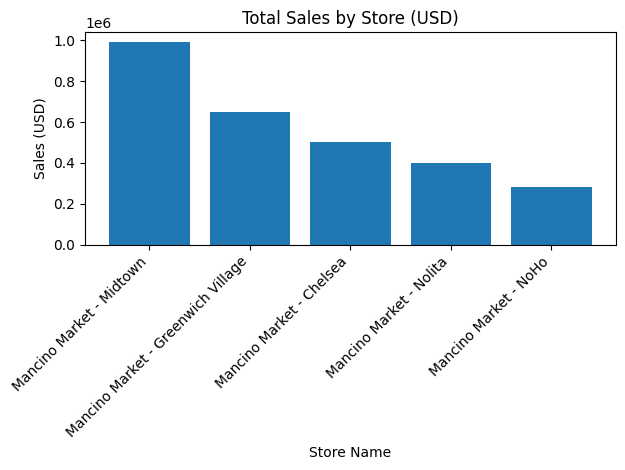

In [8]:
stores['store_id'] = stores['store_id'].astype(str).apply(lambda x: 'S' + x.zfill(4))
store_sales_with_names = pd.merge(store_sales, stores[["store_id", "store_name"]], on="store_id")

plt.figure()
plt.bar(store_sales_with_names["store_name"], store_sales_with_names["total_usd"])
plt.title("Total Sales by Store (USD)")
plt.xlabel("Store Name")
plt.ylabel("Sales (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

** Display the Daily sales by store (trend) **

In [9]:
# Calculate daily sales by store
daily_store_sales = transactions.groupby(["date", "store_id"])["total_cents"].sum().reset_index()
daily_store_sales["total_usd"] = (daily_store_sales["total_cents"] / 100.0).round(2)

# Pivot the table to have dates as index and stores as columns
pivot_daily = daily_store_sales.pivot(index="date", columns="store_id", values="total_usd")

# Fill any missing values with 0 (in case a store had no sales on a given day)
pivot_daily = pivot_daily.fillna(0)

display(pivot_daily.head())

store_id,S0001,S0002,S0003,S0004,S0005
date,,,,,
2025-07-01,"16,893.70","3,944.61","8,462.28","10,569.53","6,186.72"
2025-07-02,"17,830.86","4,543.34","8,194.62","11,682.89","6,644.04"
2025-07-03,"18,823.40","6,294.97","8,862.25","11,219.96","6,635.99"
2025-07-04,"19,100.57","5,329.02","9,543.94","12,432.30","6,860.97"
2025-07-05,"21,979.78","6,535.99","11,253.48","13,996.95","8,405.49"


**Displaying the sales by categories **

In [10]:
# Join transaction items with product information
items_with_category = pd.merge(items.drop('category', axis=1), products[['product_id', 'category']], on='product_id')

# Calculate sales by category (using __line_total_std from items)
category_sales = (items_with_category.groupby('category', as_index=False)['__line_total_std']
                                     .sum()
                                     .rename(columns={'__line_total_std': 'total_usd'}))

# The '__line_total_std' column seems to be already in USD, so no conversion needed.

# Sort and get the top 10
top_10_categories = category_sales.sort_values('total_usd', ascending=False).head(10).reset_index(drop=True)

display(top_10_categories)

,category,total_usd
0,Alcohol,"180,222.07"
1,Snacks/Cookies/Chips,"64,397.37"
2,Dairy & Eggs,"55,357.83"
3,Prepared Meals,"52,765.39"
4,Meat and Seafood,"48,896.54"
5,Pet Food,"45,984.41"
6,Frozen Foods,"35,485.81"
7,Deli,"34,222.16"
8,Breakfast & Cereal,"26,522.42"
9,Beverages,"24,791.08"


** Calculating the total spending by customer **

In [11]:
# Calculate total spending per customer
customer_spending = transactions.groupby('customer_id', as_index=False)['total_cents'].sum()

# Convert to USD
customer_spending['total_usd'] = (customer_spending['total_cents'] / 100.0).round(2)

# Sort and get the top 5 customers
top_5_customers = customer_spending.sort_values('total_usd', ascending=False).head(5).reset_index(drop=True)

# Merge with the customers DataFrame to get demographic and location information
top_5_customers_info = pd.merge(top_5_customers, customers, on='customer_id')

display(top_5_customers_info)

,customer_id,total_cents,total_usd,first_name,last_name,email,phone,address,city,state,zip,latitude,longitude,birth_date,gender,loyalty_tier,signup_date,marketing_opt_in,home_store_id
0,C000117,229658,"2,296.58",Cameron,Perez,cameron.perez117@example.com,(715) 510-2512,65 Bleecker Street,New York,NY,10012,40.73,-74.00,1954-12-21,NaN,NaN,2023-10-13,False,S0001
1,C000097,221481,"2,214.81",Sage,Kim,sage.kim97@example.com,(673) 726-3514,6832 Clyde Street,Forest Hills,NY,11375,40.72,-73.85,1975-01-17,NaN,Silver,2023-08-27,True,S0001
2,C000290,219741,"2,197.41",Riley,Clark,riley.clark290@example.com,(776) 653-8777,183 Van Siclen Avenue,Brooklyn,NY,11207,40.68,-73.89,1975-05-16,NaN,Silver,2024-02-07,False,S0001
3,C000728,208241,"2,082.41",Jamie,Rodriguez,jamie.rodriguez728@example.com,(548) 532-5770,68 Jay St #317,Brooklyn,NY,11201,40.70,-73.99,1965-02-05,NaN,Gold,2024-01-06,False,S0001
4,C000074,205672,"2,056.72",Parker,Smith,parker.smith74@example.com,(468) 881-7644,1682 Seward Avenue,Bronx,NY,10473,40.82,-73.87,1974-04-01,NaN,NaN,2024-07-30,True,S0001


**Displaying a customer map**

In [13]:


# Ensure numeric + correct column names
if "latitude" not in customers.columns or "longitude" not in customers.columns:
    # try common alternatives
    rename_map = {}
    for c in customers.columns:
        lc = c.lower()
        if lc in {"lat"} and "latitude" not in customers.columns:
            rename_map[c] = "latitude"
        if lc in {"lon", "lng", "long"} and "longitude" not in customers.columns:
            rename_map[c] = "longitude"
    customers = customers.rename(columns=rename_map)

customers["latitude"] = pd.to_numeric(customers["latitude"], errors="coerce")
customers["longitude"] = pd.to_numeric(customers["longitude"], errors="coerce")

# Filter valid NYC-ish bounds to avoid outliers
valid = customers[
    customers["latitude"].between(30.0, 45.0) &
    customers["longitude"].between(-80.0, -69.0)
].dropna(subset=["latitude", "longitude"])

hover = None
for cand in ["customer_name","name","full_name","customer_id","email"]:
    if cand in valid.columns:
        hover = cand
        break

fig = px.scatter_mapbox(
    valid,
    lat="latitude",
    lon="longitude",
    hover_name=hover,
    zoom=10,
    height=700,
    mapbox_style="open-street-map"
)
fig.show()
